In [1]:
import pandas as pd
!pip install wordcloud

# Loading the dataset
df = pd.read_csv('Wordfreq_ultimate.csv')


In [2]:
print(df.head()) #Eyeballing the data using head function

                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  
0  There is nothing to worry about it, also 74 lo...  Human written  
1  As of my last knowledge update in September 20...   AI Generated  
2  Opensource and proprietary software each come ...  Human written  
3  Both opensource software and proprietary softw...   AI Generated  
4  Artificial intelligence AI is a wideranging br...  Human written  


In [3]:
from collections import Counter

#The Counter class from the collections module is imported in this line. 
#For counting the instances of items in an iterable, such as a list of words, I am using the Counter class.

# Function to calculate word frequency distribution
def word_frequency(text):
    words = text.split()
    word_freq = Counter(words)
    return word_freq

# Applying the function to my DataFrame
df['Word_Frequency'] = df['Answer'].apply(word_frequency)


In [4]:
print(df.head())

                                            Question  \
0  Whats your view on the Microsoft report that 7...   
1  Whats your view on the Microsoft report that 7...   
2  What are the pros and cons of opensource softw...   
3  What are the pros and cons of opensource softw...   
4               What is the artificial intelligence?   

                                              Answer          Label  \
0  There is nothing to worry about it, also 74 lo...  Human written   
1  As of my last knowledge update in September 20...   AI Generated   
2  Opensource and proprietary software each come ...  Human written   
3  Both opensource software and proprietary softw...   AI Generated   
4  Artificial intelligence AI is a wideranging br...  Human written   

                                      Word_Frequency  
0  {'There': 1, 'is': 3, 'nothing': 1, 'to': 3, '...  
1  {'As': 2, 'of': 9, 'my': 1, 'last': 1, 'knowle...  
2  {'Opensource': 2, 'and': 17, 'proprietary': 5,...  
3  {'Both': 1, '

In [5]:
import nltk
from nltk.corpus import stopwords

# Downloading the NLTK stop words list 
nltk.download('stopwords')

# Defining a function to remove stop words from the word frequency dictionary
def delete_stop_words(word_freq_dict):
    stop_words = set(stopwords.words('english'))
    filtered_dict = {word: freq for word, freq in word_freq_dict.items() if word.lower() not in stop_words}
    return filtered_dict

# Applying the remove_stop_words function to the 'Word_Frequency' column
df['Word_Frequency'] = df['Word_Frequency'].apply(delete_stop_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df.to_csv('1Wordfreq_ultimate.csv', index=False)

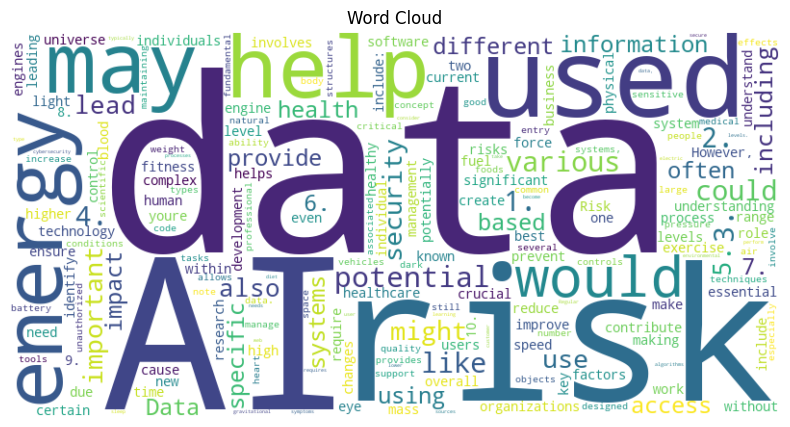

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combining the word frequency dictionaries from all rows into one dictionary
combined_word_freq = {}
for word_freq_dict in df['Word_Frequency']:
    for word, freq in word_freq_dict.items():
        combined_word_freq[word] = combined_word_freq.get(word, 0) + freq

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_word_freq)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud')
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading the CSV file into a Pandas DataFrame
data = pd.read_csv('1Wordfreq_ultimate.csv')

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Word_Frequency'], data['Label'], test_size=0.2, random_state=42)

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transforming the word frequency data into TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initializing and training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predicting the labels for the test set
y_pred = model.predict(X_test_tfidf)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 0.80
Classification Report:
                precision    recall  f1-score   support

 AI Generated       0.74      0.83      0.78        35
Human written       0.85      0.78      0.81        45

     accuracy                           0.80        80
    macro avg       0.80      0.80      0.80        80
 weighted avg       0.81      0.80      0.80        80

